지도 학습

K-최근접 이웃

In [38]:
from google.colab import files
file_uploaded = files.upload()

Saving iris.data to iris (1).data


In [39]:
# 라이브러리 호출 및 데이터 준비
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
names = ['sepal-length', 'sepal-width', 'petal-legth', 'petal-width', 'Class']
dataset = pd.read_csv('iris.data')
dataset.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [40]:
# 훈련과 테스트 데이터셋 분리
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

In [41]:
# 모델 생성 및 훈련
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
# 모델 정확도
from sklearn.metrics import accuracy_score
y_pred = knn.predict(x_test)
print('정확도 : {}'.format(accuracy_score(y_test, y_pred)))

정확도 : 0.8333333333333334


서포트 벡터 머신

In [43]:
# 라이브러리 호출
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [44]:
# 데이터 준비
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.6, random_state=42)

In [45]:
# SVM 모델에 대한 정확도
svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5)
svm.fit(x_train, y_train)
predictations = svm.predict(x_test)
score = metrics.accuracy_score(y_test, predictations)
print('{0:f}'.format(score))

0.988889


결정트리

In [58]:
from google.colab import files
file_uploaded = files.upload()

Saving train.csv to train (1).csv


In [59]:
# 라이브러리 호출 및 데이터 준비
import pandas as pd
df = pd.read_csv('train.csv', index_col='PassengerId')
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [60]:
# 데이터 전처리
df = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df = df.dropna()
x = df.drop('Survived', axis=1)
y = df['Survived']

<ipython-input-60-812feceb7f6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male':0, 'female':1})


In [61]:
# 훈련과 테스트 데이터셋으로 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)

In [62]:
# 결정 트리 모델 생성
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [63]:
# 모델 훈련
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
# 모델 예측
y_predict = model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8324022346368715

In [66]:
# 혼동 행렬을 이용한 성능 측정
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_predict), columns=['예측:사망', '예측:생존'], index=['실제:사망', '실제:생존'])

,예측:사망,예측:생존
실제:사망,99,13
실제:생존,17,50


로지스틱 회귀와 선형 회귀

In [67]:
# 라이브러리 호출 및 데이터 준비
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

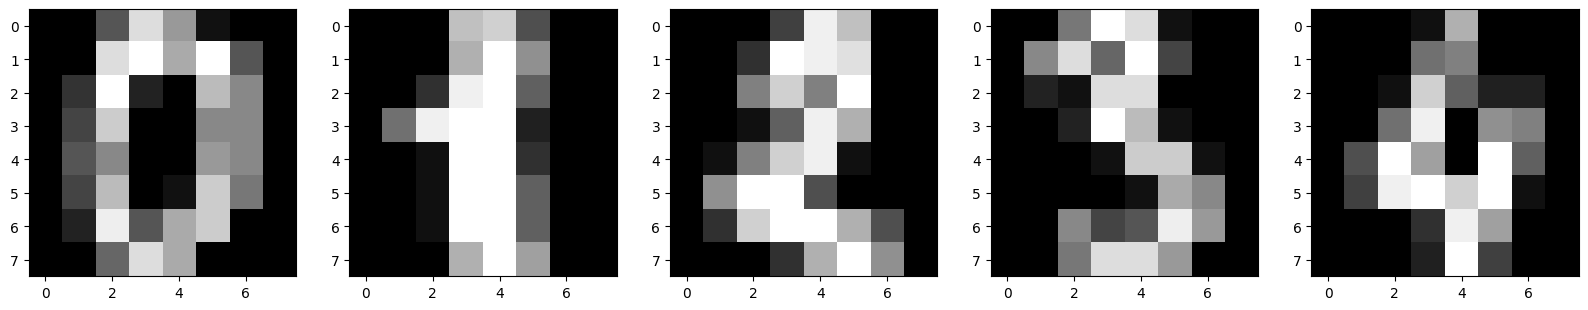

In [69]:
# 숫자 데이터셋의 시각화
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])) :
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)


In [76]:
# 훈련과 테스트 데이터셋으로 분리 및 로지스틱 회귀 모델 생성
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

from sklearn.linear_model import LogisticRegression
Log_R = LogisticRegression()
Log_R.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
# 전체 데이터를 사용한 모델 예측
predictations = Log_R.predict(x_test)
score = Log_R.score(x_test, y_test)
print(score)

0.9511111111111111


In [78]:
# 데이터 호출
from google.colab import files
file_uploaded = files.upload()

Saving weather.csv to weather.csv


In [91]:
dataset = pd.read_csv('weather.csv')
print(dataset.head())
print(dataset.shape)

        Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  11/1/2007  Canberra      8.0     24.3       0.0          3.4       6.3   
1  11/2/2007  Canberra     14.0     26.9       3.6          4.4       9.7   
2  11/3/2007  Canberra     13.7     23.4       3.6          5.8       3.3   
3  11/4/2007  Canberra     13.3     15.5      39.8          7.2       9.1   
4  11/5/2007  Canberra      7.6     16.1       2.8          5.6      10.6   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0          NW           30.0         SW  ...          29       1019.7   
1         ENE           39.0          E  ...          36       1012.4   
2          NW           85.0          N  ...          69       1009.5   
3          NW           54.0        WNW  ...          56       1005.5   
4         SSE           50.0        SSE  ...          49       1018.3   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1015.0        

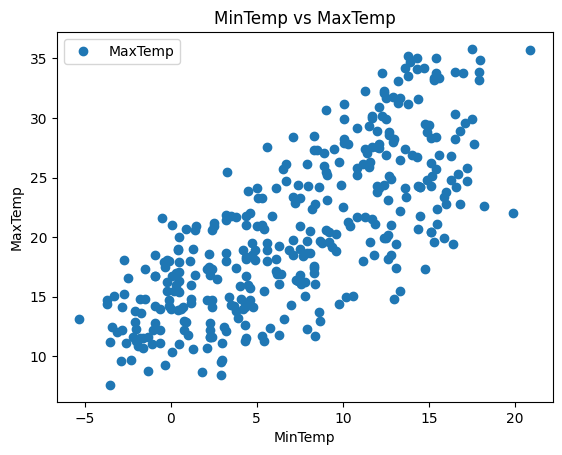

In [83]:
# 데이터 간 관계를 시각화로 표현
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [92]:
# 변수 분리 후 선형 회귀 모델 생성
from sklearn.linear_model import LinearRegression
x = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [93]:
# 회귀 모델에 대한 예측
y_pred = reg.predict(x_test)
df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,24.4,22.579395
1,34.9,29.211604
2,30.2,24.053219
3,14.3,17.339131
4,20.2,24.790131
...,...,...
69,17.0,21.269329
70,11.1,13.982088
71,26.1,19.959263
72,12.9,12.753901


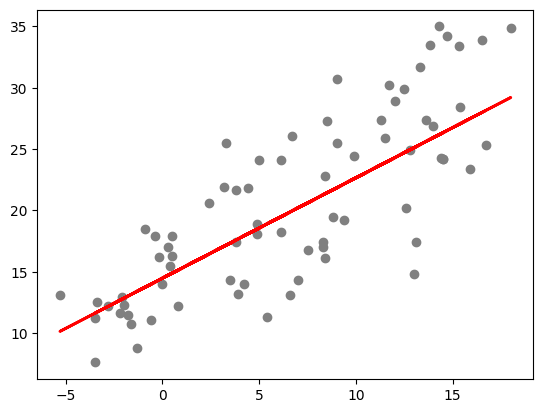

In [96]:
# 테스트 데이터셋을 사용한 회귀선 표현
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [97]:
# 선형 회귀 모델 평가
print('평균제곱법:', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균제곱법:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법: 19.55996038985976
루트 평균제곱법: 4.422664399415782
